In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
import pandas as pd
from matplotlib.pyplot import figure
from scipy import stats
import pickle

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Globla minimum of the function is:
-1.031628453488966
If we start with (0,0) the minimum is:
0.0


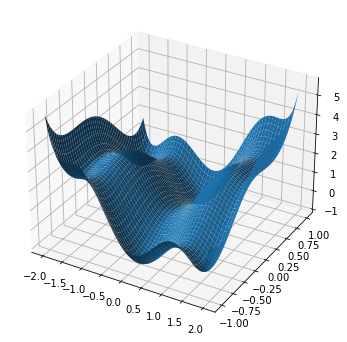

In [2]:
def f(x): 
    
    return (4 - (2.1 * (x[0]**2)) + (x[0]**4)/3)*(x[0]**2) + x[0]*x[1] + (4*(x[1]**2)-4) * (x[1]**2)

f_minimum = optimize.minimize(f, (0.5, 0.75)).fun

print("Globla minimum of the function is:")

print(f_minimum )


f_minimum = optimize.minimize(f, (0, 0)).fun

print("If we start with (0,0) the minimum is:")

print(f_minimum)

x= np.linspace(-2,2,1000)
y= np.linspace(-1,1,1000)


#Plotting the Function:

fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(x,y)

z = (4 - (2.1 * (x**2)) + (x**4)/3)*(x**2) + x*y + (4*(y**2)-4) * (y**2)

ax.plot_surface(x,y,z)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

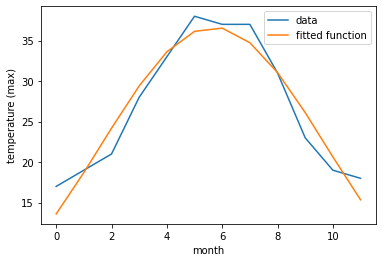

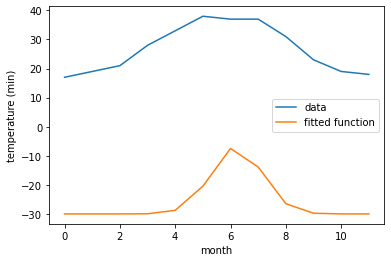

I couldn't fit the Min temperature with gaussian function
But the fit for max temperature seems proper


In [3]:
#First, the max temperature:
def fit_func(month, A, avg, sigma):
    
    return A * (np.exp(-(month - avg) ** 2 / (2 * (sigma ** 2))))


Max=np.array([17,19,21,28,33,38,37, 37,31,23,19,18])

#Instead of month we use numbers for easier calculations:

month = np.arange(12)

popt, pcov = curve_fit(fit_func, month, Max, p0=[50,5,5])

y_predict = fit_func(month, popt[0], popt[1], popt[2])


#Plotting:

plt.plot(month, Max, label='data')

plt.plot(month, y_predict, label='fitted function')

plt.legend(loc='best')

plt.xlabel("month")

plt.ylabel("temperature (max)")

plt.figure()


#Second, the min temperature:
def fit_func(month, A, avg, sigma):
    
    return A * (np.exp(-(month - avg) ** 2 / (2 * (sigma ** 2)))) - 30

Min=np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])

#Instead of month we use numbers for easier calculations

popt, pcov = curve_fit(fit_func, month, Min, p0=[50,5,5])

y_predict = fit_func(month, popt[0], popt[1], popt[2])

#Plotting:

plt.plot(month, Max, label='data')

plt.plot(month, y_predict, label='fitted function')

plt.legend(loc='best')

plt.xlabel("month")

plt.ylabel("temperature (min)")

plt.show()

print("I couldn't fit the Min temperature with gaussian function")
print("But the fit for max temperature seems proper")

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

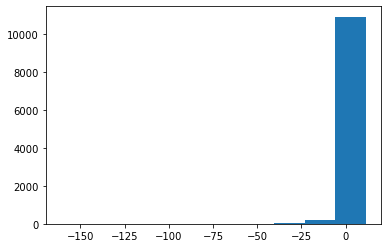

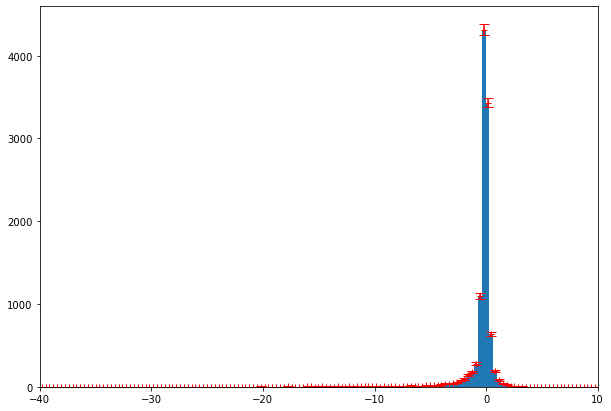

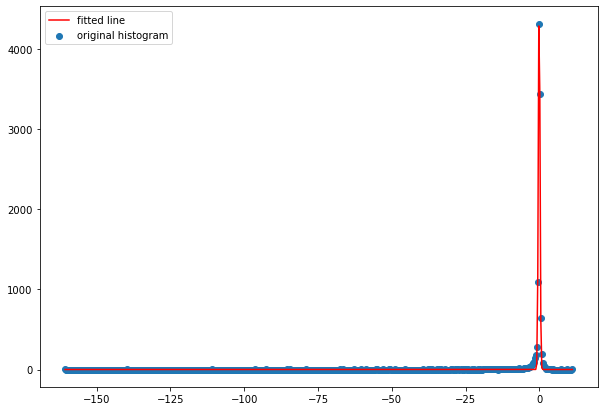

The Covariance matrix:
[[1.        0.1143786]
 [0.1143786 1.       ]]


The p-value:
0.0
p value is 0 so it is not a satisfactory fit!




<ipython-input-4-99118b001d00>:63: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = np.sum(((y - (a_hat + b_hat * x))**2) / sigma_y)


In [4]:
def fit_func(bin_center, A , avg, sigma):
    
    return A * np.exp(-(bin_center - avg) ** 2 / (2 * (sigma ** 2)))

data = np.load('residuals_261.pkl', allow_pickle=True)

#converting dictionary to panda data framework:
data = pd.DataFrame(data.item())  

residual = data['residuals']

plt.hist(residual)

plt.figure(figsize=(10,7))

f,edge,_ = plt.hist(residual, bins=500)

bin_center = 0.5 * (edge[:-1] + edge[1:])

plt.errorbar(bin_center, f, yerr=f**(1/2), fmt='+', capsize=5, color='r')

plt.xlim(-40,10)

plt.show()

popt, pcov = curve_fit(fit_func, bin_center, f, p0=[4000,0,1])

f_predicted = fit_func(bin_center, popt[0], popt[1],popt[2])


plt.figure(figsize=(10,7))

plt.scatter(bin_center, f, label = 'original histogram')

plt.plot(bin_center, f_predicted , label='fitted line', color = 'r')

plt.legend(loc='best')

plt.show()


#This part is copied from the lecture note:
x=bin_center

y= f_predicted

cov = np.cov(x, y, ddof=2)

b_hat = cov[0, 1] / cov[0, 0]

a_hat = np.mean(y - b_hat * x)

ssr = np.sum((y - a_hat - b_hat * x)**2)

tss = np.sum((np.mean(y) - y)**2)

rsq = 1 - ssr / tss

sigma_y = np.sqrt(np.abs(y)) 

ndof = len(x) - 1

chi2 = np.sum(((y - (a_hat + b_hat * x))**2) / sigma_y)

pvalue = 1. - stats.chi2.cdf(chi2, ndof)

print("The Covariance matrix:")
print(np.corrcoef(x,y)) 
print("\n")

print("The p-value:")
print(pvalue)

print("p value is 0 so it is not a satisfactory fit!")
print("\n")

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

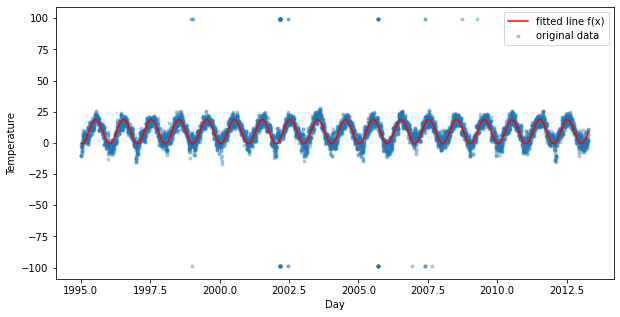

best-fit values
[-9.6716698  -0.22364388  9.05236246]
Average temperature:
8.943104622162323


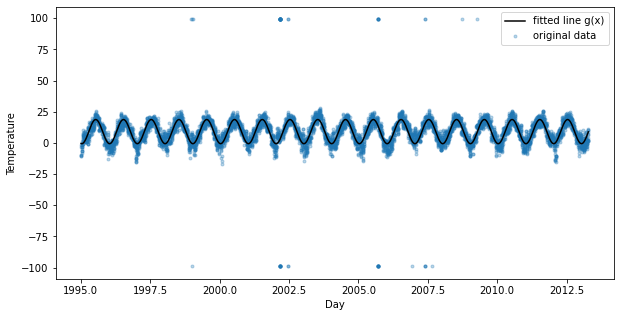

In [5]:
def f(Day,a,b,c):
    
    return a * np.cos(2*np.pi*Day + b) + c

def g(Day,a,b,c,d):
    
    return a* np.cos(2*(np.pi)*b*Day + c) + d


data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep = ' ')

Day= np.array(data['1995.00274'])

Temperature= np.array(data['0.944444'])


#using f for fitting
popt, pcov = curve_fit(f, Day, Temperature , p0=[-15,0,5])

f_predicted = f(Day, popt[0], popt[1], popt[2])

plt.figure(figsize=(10,5))

plt.scatter(Day, Temperature, marker='.', alpha=0.3, label='original data')

plt.plot(Day, f_predicted, color='red', label='fitted line f(x)')

plt.xlabel("Day")

plt.ylabel("Temperature")

plt.legend()

plt.show()

print("best-fit values")
print(popt)

average_temp = np.average(Temperature)

print("Average temperature:")
print(average_temp)


#using g to fitting:
popt, pcov = curve_fit(g, Day, Temperature , p0=[-15,1,1,20])

g_predicted = g(Day, popt[0], popt[1], popt[2], popt[3])

plt.figure(figsize=(10,5))

plt.scatter(Day, Temperature, marker='.', alpha=0.3, label='original data')

plt.plot(Day, g_predicted, color='0', label='fitted line g(x)')

plt.xlabel("Day")

plt.ylabel("Temperature")

plt.legend()

plt.show()